In [1]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is AE83-8D62

 Directory of C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\Project\Dose comparison with CC

19/10/2016  12:58    <DIR>          .
19/10/2016  12:58    <DIR>          ..
19/10/2016  09:31    <DIR>          .ipynb_checkpoints
19/10/2016  11:58             1,934 ALL_DATA_19_10_2016.csv
19/10/2016  12:58           361,980 Dose comparison 19 - 10 - 2016.ipynb
19/10/2016  10:15               941 Eclipse_data_19_10.csv
19/10/2016  09:40               139 EGS_data_19_10.csv
19/10/2016  12:57            81,402 Fig1.png
19/10/2016  09:39               111 PINNACLE_TRUEBEAM_CCC_data_19_10.csv
               6 File(s)        446,507 bytes
               3 Dir(s)  372,990,226,432 bytes free


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')

### Helper functions for cleaning data

In [3]:
def d1_id(df):    # helper function to get the index when Mass density = 1.0
    return df[df['Mass density']==1.0].index.tolist()[0]
#d1_id(EGS)

def n_r(df, raw_col = 'Raw_data_col', norm_col = 'Normalised_data_col'): # norm and return, pass the dataframe, column to normalise and drop, and the norm col name
    if raw_col in df.columns:
        df[norm_col] = df[raw_col]/df[raw_col].iloc[d1_id(df)]
        df = df.drop(raw_col, 1) 
        return df

# EGS = n_r(EGS, raw_col = 'EGS_Dose', norm_col = 'EGS_Dose_norm')

# Load and format data

In [4]:
CCC = pd.read_csv("PINNACLE_TRUEBEAM_CCC_data_19_10.csv")  # index_col=[0]
CCC = n_r(CCC, raw_col = 'CCC_Dose', norm_col = 'CCC')
#CCC

In [5]:
EGS = pd.read_csv("EGS_data_19_10.csv")  # index_col=[0]
EGS = n_r(EGS, raw_col = 'EGS_Dose', norm_col = 'EGS')
#EGS

### Combine cleaned CC & EGS data

In [6]:
CCC_EGS_data = pd.merge(CCC, EGS, how='inner', on=['Mass density'])
CCC_EGS_data

,Mass density,CCC,EGS
0,0.0,1.021097,0.966667
1,0.5,1.015471,1.020000
2,1.0,1.000000,1.000000
3,1.5,0.967651,0.973333
4,2.0,0.928270,0.946667
5,2.5,0.881857,0.920000
6,3.0,0.853727,0.900000
7,3.5,0.838256,0.873333
8,4.0,0.822785,0.853333


In [7]:
#fig, ax = plt.subplots()
#ax.scatter(x='Mass density', y='CCC_Dose_norm', data=CCC_EGS_data); #, c='k', alpha=.15  # Matplotlib plot

In [8]:
ECLIPSE = pd.read_csv("Eclipse_data_19_10.csv")  # index_col=[0]
ECLIPSE = n_r(ECLIPSE, raw_col = 'AAA (Gy) point', norm_col = 'AAA')
ECLIPSE = n_r(ECLIPSE, raw_col = 'AXB Dw (Gy) point', norm_col = 'AXB Dw')
ECLIPSE = n_r(ECLIPSE, raw_col = 'AXB Dm (Gy) point', norm_col = 'AXB Dm')
ECLIPSE

,VOI Material,CT number,Mass density,Elect density,Proton Stp PWR,AAA,AXB Dw,AXB Dm
0,Air,-993,0.001,0.0072,0.0073,1.033987,1.048493,0.908257
1,Lung,-734,0.260,0.2660,0.2699,1.013072,1.023591,1.022280
2,Adipose tissue,-105,0.920,0.8954,0.9421,1.005229,0.979030,0.998689
3,Water,0,1.000,1.0000,1.0100,1.000000,1.000000,1.000000
4,Epoxy,38,1.040,1.0384,1.0389,1.000000,1.019659,0.944954
5,Muscle skeletal,48,1.050,1.0480,1.0483,1.000000,1.002621,0.988204
6,Cartilage,128,1.100,1.1280,1.0855,0.994771,1.007864,0.982962
7,PMMA,282,1.190,1.2103,1.1617,0.994771,0.992136,0.960682
8,Radel,470,1.300,1.3209,1.2548,0.994771,1.022280,0.929227
9,PEEK,487,1.310,1.3309,1.2633,0.994771,1.003932,0.923984


In [9]:
df = pd.merge(CCC_EGS_data, ECLIPSE, how='outer', on='Mass density')   # merge 2 tables
df.sort('Mass density', inplace=True)                                  # sort on Mass density
df = df[['Mass density', 'VOI Material', 'AAA', 'AXB Dw', 'AXB Dm', 'CCC', 'EGS', 'CT number', 'Elect density', 'Proton Stp PWR' ]]   # rearrange  

C:\Users\RCole02.ROYALSURREY\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [10]:
df

,Mass density,VOI Material,AAA,AXB Dw,AXB Dm,CCC,EGS,CT number,Elect density,Proton Stp PWR
0,0.000,NaN,NaN,NaN,NaN,1.021097,0.966667,NaN,NaN,NaN
9,0.001,Air,1.033987,1.048493,0.908257,NaN,NaN,-993.0,0.0072,0.0073
10,0.260,Lung,1.013072,1.023591,1.022280,NaN,NaN,-734.0,0.2660,0.2699
1,0.500,NaN,NaN,NaN,NaN,1.015471,1.020000,NaN,NaN,NaN
11,0.920,Adipose tissue,1.005229,0.979030,0.998689,NaN,NaN,-105.0,0.8954,0.9421
2,1.000,Water,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.0000,1.0100
12,1.040,Epoxy,1.000000,1.019659,0.944954,NaN,NaN,38.0,1.0384,1.0389
13,1.050,Muscle skeletal,1.000000,1.002621,0.988204,NaN,NaN,48.0,1.0480,1.0483
14,1.100,Cartilage,0.994771,1.007864,0.982962,NaN,NaN,128.0,1.1280,1.0855
15,1.190,PMMA,0.994771,0.992136,0.960682,NaN,NaN,282.0,1.2103,1.1617


In [11]:
df.to_csv('ALL_DATA_19_10_2016.csv', index=False)  # write to file

# Plots using Matplotlib

http://matplotlib.org/users/text_intro.html  Intro

http://matplotlib.org/examples/index.html    Examples

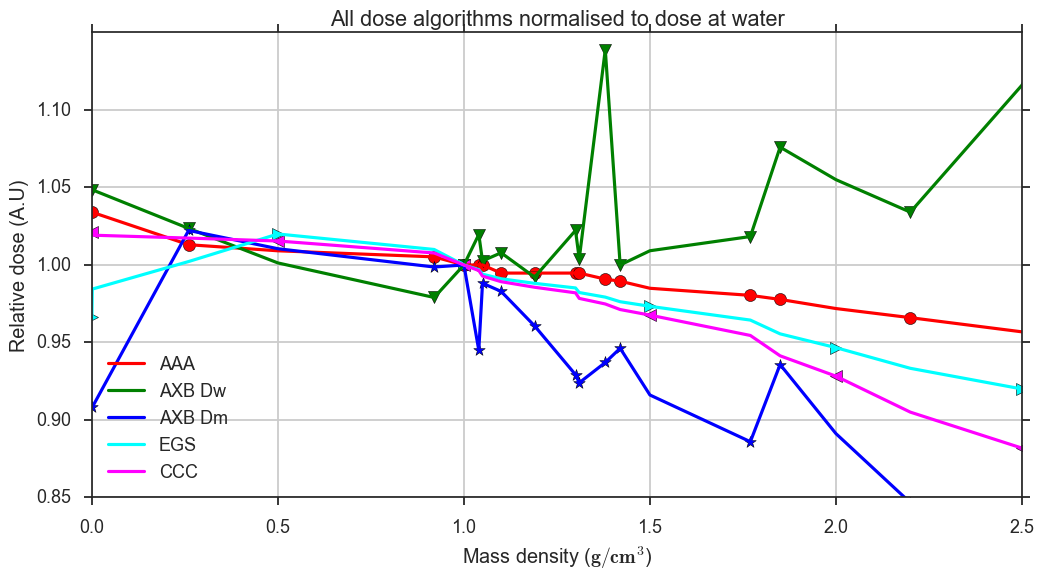

In [26]:
plt.figure(figsize=(12, 6))  # width, height

plots = ['AAA', 'AXB Dw', 'AXB Dm', 'EGS', 'CCC']
color = ['red', 'green',  'blue',   'cyan', 'magenta']
markers = ['o', 'v', '*', '>', '<']

md = 'Mass density'

for i, x in enumerate(plots):
    plt.plot(df['Mass density'], df[plots[i]].interpolate(), c=color[i]) #, c='k', alpha=.15  # Matplotlib plot, .interpolate() over NaN
    plt.scatter(df['Mass density'], df[plots[i]], c=color[i], marker=markers[i],s=75) #, c='k', alpha=.15  # Matplotlib plot
   

axes = plt.gca()
axes.set_xlim([0,2.5]) # min and max
axes.set_ylim([0.85,1.15])

plt.xlabel(r'Mass density ($\mathbf{g/cm^{3}}$)')
plt.ylabel('Relative dose (A.U)')
plt.title('All dose algorithms normalised to dose at water')

legend = plt.legend(plots, shadow=True, fontsize='small', loc='lower left') ,
plt.grid(True)
#plt.savefig('Fig1.png' , dpi=1000);#, format='pdf'
plt.show();

# Pandas native plot

http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

In [97]:
#ECLIPSE.plot.scatter(x='Mass density', y='AAA (Gy) point', c='k', alpha=.15)  # pandas native plot

# Seaborn

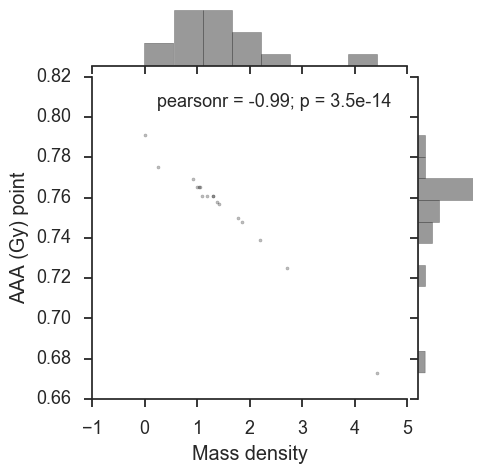

In [91]:
sns.jointplot(x='Mass density', y='AAA (Gy) point', data=ECLIPSE, size=5, alpha=.25, color='k', marker='.'); # size arg to set size

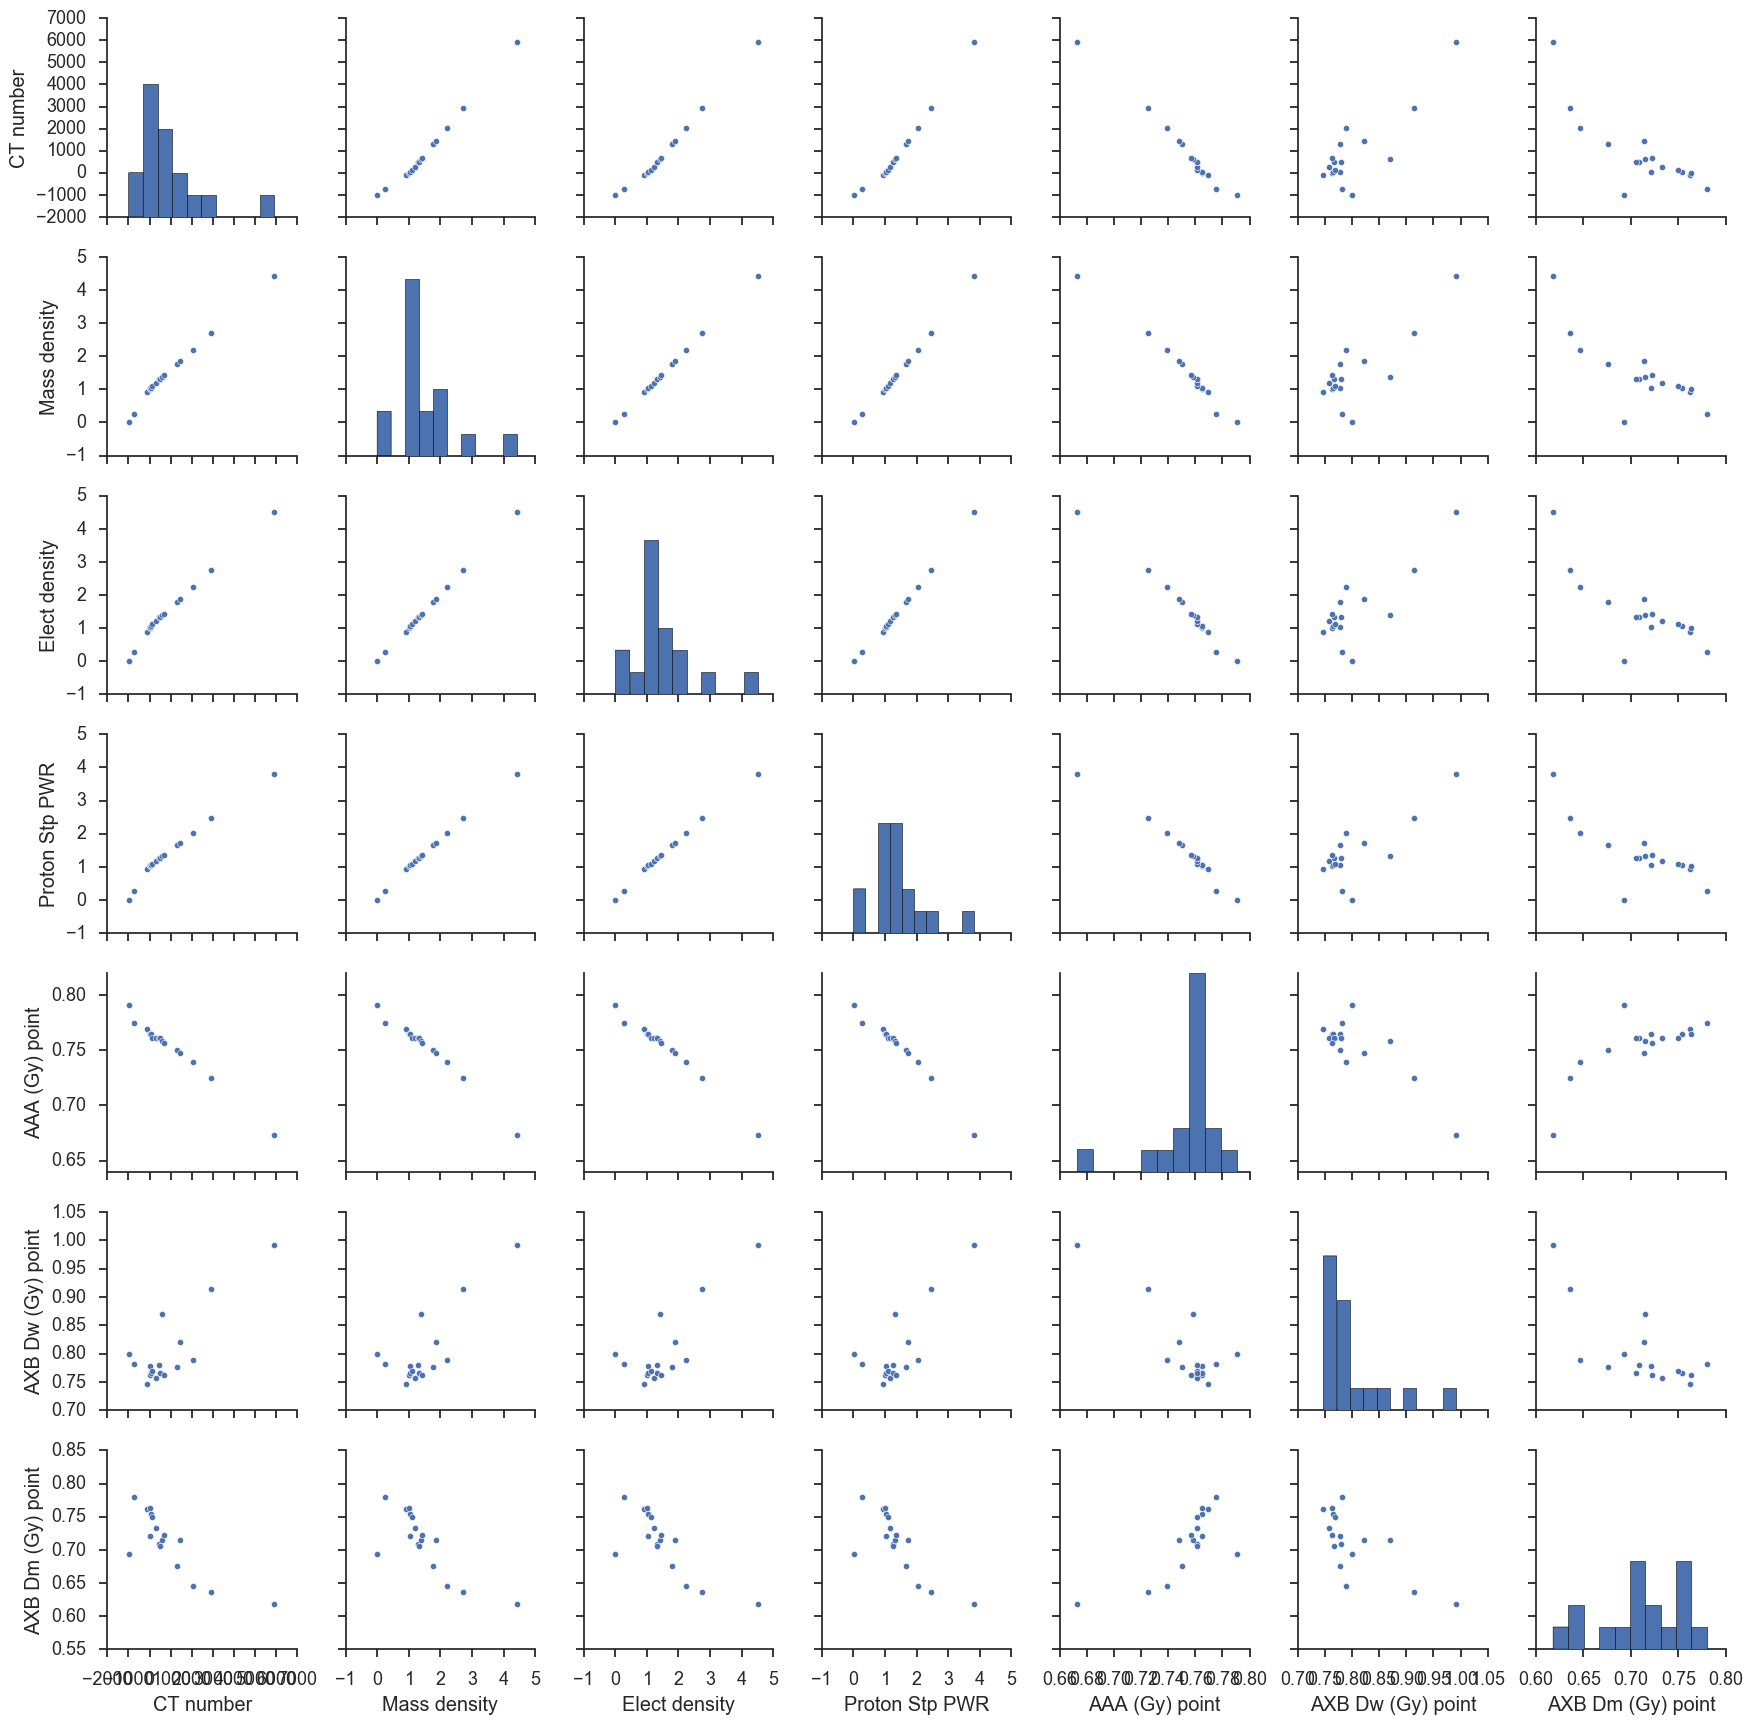

In [89]:
g = sns.pairplot(ECLIPSE)  # visualise corr